<a href="https://colab.research.google.com/github/veronica1013/electric_car_sharing_services/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_10_Veronica_Isiaho_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Electric Car Service
### 1. Specifying the question

Determine if the number of the number of blue_cars taken from postcodes starting with ‘75’ are different from all other postcodes in Paris. To investigate this, our hypothesis will be: 

1. The Null Hypothesis is that the number of blue_cars taken in postcodes starting with ‘75’ is higher than those taken from all other the Paris postcodes.

2. The Alternate Hypothesis is that the number of blue_cars taken in postcodes starting with ‘75’ is similar to those taken from all other the Paris postcodes.



### 2. Defining the metric of success

When the Null hypothesis fails to be rejected


### 3. Experimental Design

a) Loading the Datasets and Preparing the Data.

b) Data Cleaning (Removing the Outliers).

c) Exploratory Data Analysis (Univariate, Bivariate Analysis and Multivariate).

d) Hypothesis Testing to Implement the Solution.

e) Conclusions and Recommendation.


## Loading the libraries

In [1]:
# importing pandas
import pandas as pd

# importing numpy
import numpy as np

# importing seaborn
import seaborn as sns

# importing matplotlib
import matplotlib.pyplot as plt

# Importing stats
from scipy import stats

# Importing the norm
from scipy.stats import norm
%matplotlib inline

## Data Preparation

In [2]:
# Description of the features in the dataset
features_description = pd.read_excel("http://bit.ly/DSCoreAutolibDatasetGlossary")
features_description


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
# Loading the dataset
autolib_data_df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

In [4]:
# Checking the shape of the dataset
autolib_data_df.shape

(16085, 13)

In [5]:
# Checking the first three rows
autolib_data_df.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [6]:
# checking the last three rows
autolib_data_df.tail(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# Checking the data types
autolib_data_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [8]:
# Check missing values
autolib_data_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [9]:
# Check for any duplicates
autolib_data_df.duplicated().sum()

0

In [10]:
# Check the columns
autolib_data_df.columns 

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [11]:
# confirm the days of week are seven
autolib_data_df['dayOfWeek'].nunique()

7

In [12]:
# Confirm the day-type are 2
autolib_data_df['day_type'].nunique()

2

In [13]:
# Check the number of postal codes in Paris
autolib_data_df['Postal code'].nunique()

104

In [14]:
autolib_data_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packa

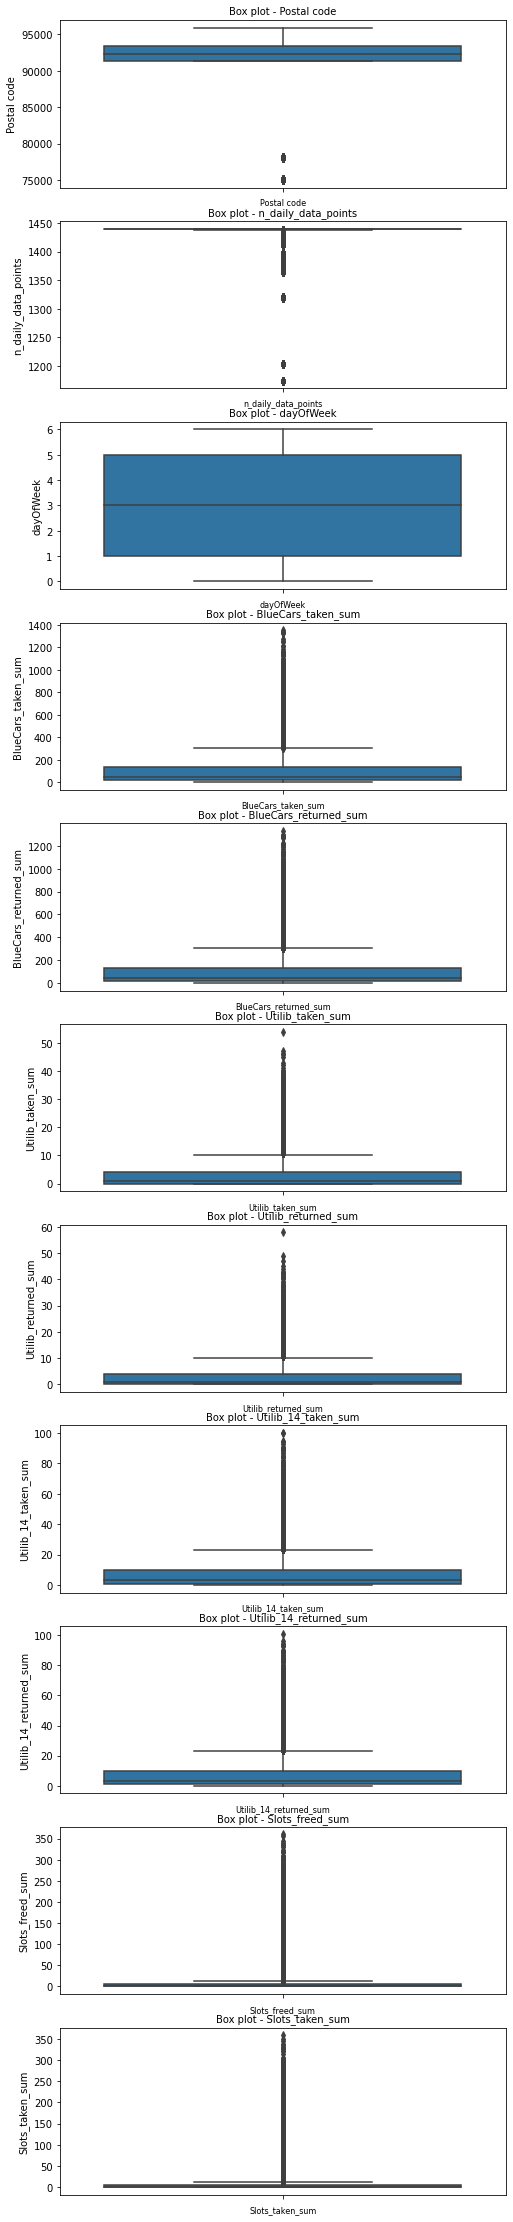

In [15]:
# Check for any outliers
col_names = ['Postal code', 'n_daily_data_points', 'dayOfWeek',
             'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
             'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
             'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=autolib_data_df[col_val], ax=ax[i], orient='h')
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()


From the above boxplots, it is evident that the number of outliers are many.

# Data Cleaning

Checking for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

In [16]:
autolib_data_df.shape

(16085, 13)

In [17]:
# Dropping the outliers
Q1= autolib_data_df.quantile(0.25)
Q3 = autolib_data_df.quantile(0.75)
IQR = Q3-Q1
IQR
autolib_data_df_new = autolib_data_df[~((autolib_data_df < (Q1 - 1.5 * IQR)) |(autolib_data_df > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_data_df_new.shape

(9783, 13)

In [18]:
autolib_data_df_new.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packa

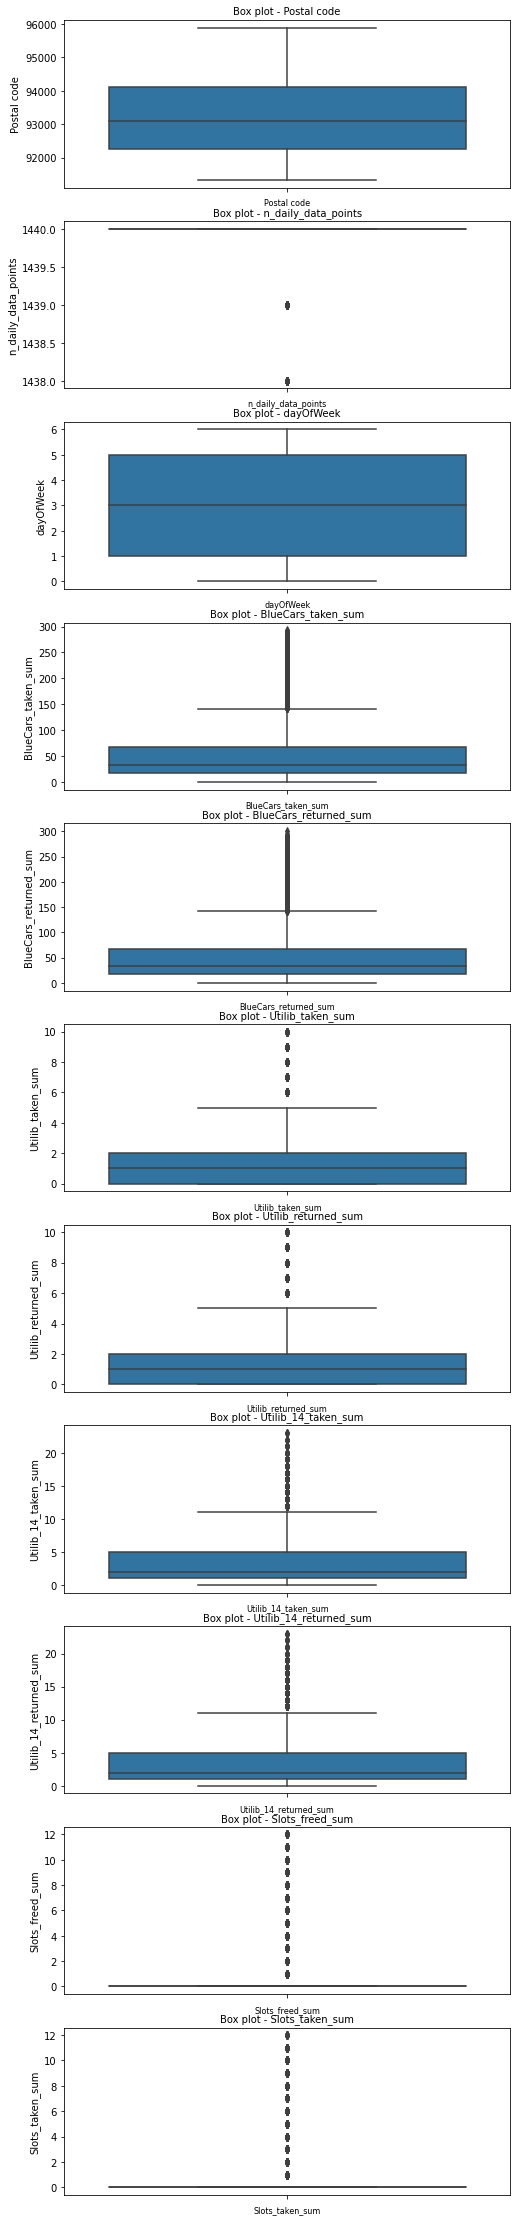

In [19]:
# Confirm if outliers have been dropped
col_names1 = ['Postal code', 'n_daily_data_points', 'dayOfWeek',
             'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
             'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
             'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names1), figsize= (8,40))

for i, col_val in enumerate(col_names1):
  sns.boxplot(y=autolib_data_df_new[col_val], ax=ax[i], orient='h')
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [20]:
# Dropping the outliers
Q1= autolib_data_df_new.quantile(0.25)
Q3 = autolib_data_df_new.quantile(0.75)
IQR = Q3-Q1
IQR
autolib_data_df_new_df = autolib_data_df_new[~((autolib_data_df_new < (Q1 - 1.5 * IQR)) |(autolib_data_df_new > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_data_df_new_df.shape

(5319, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packa

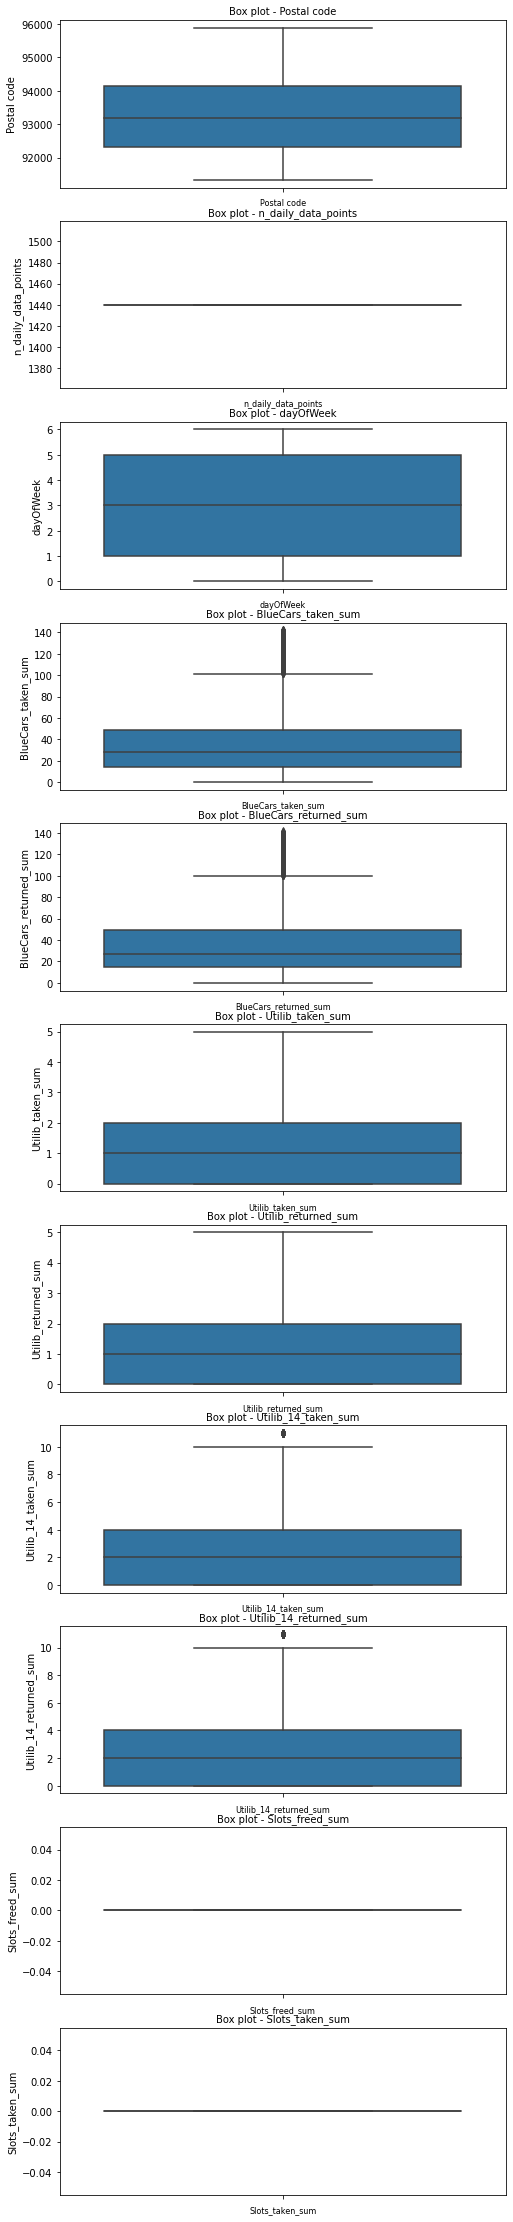

In [21]:
# Confirm if outliers have been dropped
col_names2 = ['Postal code', 'n_daily_data_points', 'dayOfWeek',
             'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
             'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
             'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names2), figsize= (8,40))

for i, col_val in enumerate(col_names2):
  sns.boxplot(y=autolib_data_df_new_df[col_val], ax=ax[i], orient='h')
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [22]:
# Change the date data type from object to datetime
autolib_data_df_new_df["date"] = pd.to_datetime(autolib_data_df_new_df["date"])
autolib_data_df_new_df.head(3)
autolib_data_df_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5319 entries, 3912 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             5319 non-null   int64         
 1   date                    5319 non-null   datetime64[ns]
 2   n_daily_data_points     5319 non-null   int64         
 3   dayOfWeek               5319 non-null   int64         
 4   day_type                5319 non-null   object        
 5   BlueCars_taken_sum      5319 non-null   int64         
 6   BlueCars_returned_sum   5319 non-null   int64         
 7   Utilib_taken_sum        5319 non-null   int64         
 8   Utilib_returned_sum     5319 non-null   int64         
 9   Utilib_14_taken_sum     5319 non-null   int64         
 10  Utilib_14_returned_sum  5319 non-null   int64         
 11  Slots_freed_sum         5319 non-null   int64         
 12  Slots_taken_sum         5319 non-null   int6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Rename the postal code column, remove white spaces and have all column names
# be in lower cases
autolib_data_df_new_df.columns = autolib_data_df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
autolib_data_df_new_df.head(1)
autolib_data_df_new_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [24]:
# Correct dayofweek to make it more readable
autolib_data_df_new_df.columns = autolib_data_df_new_df.columns.str.replace('dayofweek', 'day_of_week')
autolib_data_df_new_df.head(1)

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3912,91330,2018-01-14,1440,6,weekend,27,30,0,0,2,1,0,0


In [25]:
# Checking for the total number of Outliers

# Bluecars taken
Q1_bluecars_taken_sum = autolib_data_df_new_df['bluecars_taken_sum'].quantile(.25)
Q3_bluecars_taken_sum = autolib_data_df_new_df['bluecars_taken_sum'].quantile(.75)

IQR_bluecars_taken_sum = Q3_bluecars_taken_sum - Q1_bluecars_taken_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.bluecars_taken_sum < Q1_bluecars_taken_sum - 1.5* IQR_bluecars_taken_sum)  |
                    (autolib_data_df_new_df.bluecars_taken_sum > Q3_bluecars_taken_sum + 1.5 * IQR_bluecars_taken_sum) ]
print('Total number of outliers for BlueCar taken are: ' + str(anomalies.bluecars_taken_sum.count()))

# Bluecars returned
Q1_bluecars_returned_sum = autolib_data_df_new_df['bluecars_returned_sum'].quantile(.25)
Q3_bluecars_returned_sum = autolib_data_df_new_df['bluecars_returned_sum'].quantile(.75)

IQR_bluecars_returned_sum = Q3_bluecars_returned_sum - Q1_bluecars_returned_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.bluecars_returned_sum < Q1_bluecars_returned_sum - 1.5* IQR_bluecars_returned_sum)  |
                    (autolib_data_df_new_df.bluecars_returned_sum > Q3_bluecars_returned_sum + 1.5 * IQR_bluecars_returned_sum) ]
print('Total number of outliers for BlueCar returned are: ' + str(anomalies.bluecars_returned_sum.count()))

# Utilib taken
Q1_utilib_taken_sum = autolib_data_df_new_df['utilib_taken_sum'].quantile(.25)
Q3_utilib_taken_sum = autolib_data_df_new_df['utilib_taken_sum'].quantile(.75)

IQR_utilib_taken_sum = Q3_utilib_taken_sum - Q1_utilib_taken_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.utilib_taken_sum < Q1_utilib_taken_sum - 1.5* IQR_utilib_taken_sum)  |
                    (autolib_data_df_new_df.utilib_taken_sum > Q3_utilib_taken_sum + 1.5 * IQR_utilib_taken_sum) ]
print('Total number of outliers for utilib taken are: ' + str(anomalies.utilib_taken_sum.count()))

# Utilib returned
Q1_utilib_returned_sum = autolib_data_df_new_df['utilib_returned_sum'].quantile(.25)
Q3_utilib_returned_sum = autolib_data_df_new_df['utilib_returned_sum'].quantile(.75)

IQR_utilib_returned_sum = Q3_utilib_returned_sum - Q1_utilib_returned_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.utilib_returned_sum < Q1_utilib_returned_sum - 1.5* IQR_utilib_returned_sum)  |
                    (autolib_data_df_new_df.utilib_returned_sum > Q3_utilib_returned_sum + 1.5 * IQR_utilib_returned_sum) ]
print('Total number of outliers for utilib returned are: ' + str(anomalies.utilib_returned_sum.count()))

# Utilib 14 taken
Q1_utilib_14_taken_sum = autolib_data_df_new_df['utilib_14_taken_sum'].quantile(.25)
Q3_utilib_14_taken_sum = autolib_data_df_new_df['utilib_14_taken_sum'].quantile(.75)

IQR_utilib_14_taken_sum = Q3_utilib_14_taken_sum - Q1_utilib_14_taken_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.utilib_14_taken_sum < Q1_utilib_14_taken_sum - 1.5* IQR_utilib_14_taken_sum)  |
                    (autolib_data_df_new_df.utilib_14_taken_sum > Q3_utilib_14_taken_sum + 1.5 * IQR_utilib_14_taken_sum) ]
print('Total number of outliers for utilib_14 taken are: ' + str(anomalies.utilib_14_taken_sum.count()))

# Utilib 14 returned
Q1_utilib_14_returned_sum = autolib_data_df_new_df['utilib_14_returned_sum'].quantile(.25)
Q3_utilib_14_returned_sum = autolib_data_df_new_df['utilib_14_returned_sum'].quantile(.75)

IQR_utilib_14_returned_sum = Q3_utilib_14_returned_sum - Q1_utilib_14_returned_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.utilib_14_returned_sum < Q1_utilib_14_returned_sum - 1.5* IQR_utilib_14_returned_sum)  |
                    (autolib_data_df_new_df.bluecars_taken_sum > Q3_bluecars_taken_sum + 1.5 * IQR_utilib_14_returned_sum) ]
print('Total number of outliers for utilib_14 returned are: ' + str(anomalies.utilib_14_returned_sum.count()))

# Slots freed
Q1_slots_freed_sum = autolib_data_df_new_df['slots_freed_sum'].quantile(.25)
Q3_slots_freed_sum = autolib_data_df_new_df['slots_freed_sum'].quantile(.75)

IQR_slots_freed_sum = Q3_slots_freed_sum - Q1_slots_freed_sum

anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.slots_freed_sum < Q1_slots_freed_sum - 1.5* IQR_slots_freed_sum)  |
                    (autolib_data_df_new_df.slots_freed_sum > Q3_slots_freed_sum + 1.5 * IQR_slots_freed_sum) ]
print('Total number of outliers for slots freed are: ' + str(anomalies.slots_freed_sum.count()))

# Slots taken
Q1_slots_taken_sum = autolib_data_df_new_df['slots_taken_sum'].quantile(.25)
Q3_slots_taken_sum = autolib_data_df_new_df['slots_taken_sum'].quantile(.75)

IQR_slots_taken_sum = Q3_slots_taken_sum - Q1_slots_taken_sum


anomalies = autolib_data_df_new_df[(autolib_data_df_new_df.slots_taken_sum < Q1_slots_taken_sum - 1.5* IQR_slots_taken_sum)  |
                    (autolib_data_df_new_df.slots_taken_sum > Q3_slots_taken_sum + 1.5 * IQR_slots_taken_sum) ]
print('Total number of outliers for slots taken are: ' + str(anomalies.slots_taken_sum.count()))

Total number of outliers for BlueCar taken are: 205
Total number of outliers for BlueCar returned are: 207
Total number of outliers for utilib taken are: 0
Total number of outliers for utilib returned are: 0
Total number of outliers for utilib_14 taken are: 31
Total number of outliers for utilib_14 returned are: 1068
Total number of outliers for slots freed are: 0
Total number of outliers for slots taken are: 0


# Data Analysis

## Exploratory Data Analysis (EDA)

### Univariate Analysis 

**a) Numerical**: Measures of Central Tendency

In [26]:
autolib_data_df_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5319 entries, 3912 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             5319 non-null   int64         
 1   date                    5319 non-null   datetime64[ns]
 2   n_daily_data_points     5319 non-null   int64         
 3   day_of_week             5319 non-null   int64         
 4   day_type                5319 non-null   object        
 5   bluecars_taken_sum      5319 non-null   int64         
 6   bluecars_returned_sum   5319 non-null   int64         
 7   utilib_taken_sum        5319 non-null   int64         
 8   utilib_returned_sum     5319 non-null   int64         
 9   utilib_14_taken_sum     5319 non-null   int64         
 10  utilib_14_returned_sum  5319 non-null   int64         
 11  slots_freed_sum         5319 non-null   int64         
 12  slots_taken_sum         5319 non-null   int6

In [27]:
# Descriptive statistics
autolib_data_df_new_df.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,5319.000000,5319.0,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.0,5319.0
mean,93226.647866,1440.0,3.089679,35.523219,35.500094,1.003760,1.009964,2.512878,2.518707,0.0,0.0
std,1065.448006,0.0,2.130308,28.254281,28.221388,1.263358,1.261463,2.541823,2.554847,0.0,0.0
min,91330.000000,1440.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,92310.000000,1440.0,1.000000,14.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,93200.000000,1440.0,3.000000,28.000000,27.000000,1.000000,1.000000,2.000000,2.000000,0.0,0.0
75%,94130.000000,1440.0,5.000000,49.000000,49.000000,2.000000,2.000000,4.000000,4.000000,0.0,0.0
max,95880.000000,1440.0,6.000000,142.000000,142.000000,5.000000,5.000000,11.000000,11.000000,0.0,0.0


In [28]:
# Check for descptive analysis in the entire dataset
autolib_data_df_new_df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,5319.000000,5319,5319.0,5319.000000,5319,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.0,5319.0
unique,NaN,98,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-02-23 00:00:00,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,61,NaN,NaN,3499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,93226.647866,NaN,1440.0,3.089679,NaN,35.523219,35.500094,1.003760,1.009964,2.512878,2.518707,0.0,0.0
std,1065.448006,NaN,0.0,2.130308,NaN,28.254281,28.221388,1.263358,1.261463,2.541823,2.554847,0.0,0.0
min,91330.000000,NaN,1440.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,92310.000000,NaN,1440.0,1.000000,NaN,14.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


It seems most of the activity occurs during the week day thus this forms part of the sample size for analysis which will also be used for hypothesis testing. Since we'll be using the z-score, the larger the data, the more accurate the results will be.

In [29]:
autolib_data_df_new_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [30]:
# Make a copy of the data frame and drop other columns to only retain 
# the ones for calculation of Central tendency
autolib_data = autolib_data_df_new_df.copy(deep=True)
autolib_data.head(2)

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3912,91330,2018-01-14,1440,6,weekend,27,30,0,0,2,1,0,0
3929,91330,2018-01-31,1440,2,weekday,5,5,0,0,0,0,0,0


In [34]:
# Retain columns for calculation of Central Tendency only and drop the rest
# autolib_data.drop(['postal_code', 'date', 'day_of_week', 'day_type' ], axis=1, inplace=True)
autolib_data.head(1)

,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3912,1440,27,30,0,0,2,1,0,0


In [35]:
# The Mean of autolib cars
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The mean for {columnName} is: ', columnData.mean())


Column Name:  n_daily_data_points
The mean for n_daily_data_points is:  1440.0

Column Name:  bluecars_taken_sum
The mean for bluecars_taken_sum is:  35.5232186501222

Column Name:  bluecars_returned_sum
The mean for bluecars_returned_sum is:  35.500094002632075

Column Name:  utilib_taken_sum
The mean for utilib_taken_sum is:  1.003760105282948

Column Name:  utilib_returned_sum
The mean for utilib_returned_sum is:  1.009964278999812

Column Name:  utilib_14_taken_sum
The mean for utilib_14_taken_sum is:  2.5128783605940965

Column Name:  utilib_14_returned_sum
The mean for utilib_14_returned_sum is:  2.518706523782666

Column Name:  slots_freed_sum
The mean for slots_freed_sum is:  0.0

Column Name:  slots_taken_sum
The mean for slots_taken_sum is:  0.0


It's evident that the autolib blue cars are on high demand with the highest average mean of 35.5. Followed by utilib 14 with a mean of 1 and lastly utilib with an average mean of 2

In [36]:
# The median for autolib cars
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The median for {columnName} is: ', columnData.median())


Column Name:  n_daily_data_points
The median for n_daily_data_points is:  1440.0

Column Name:  bluecars_taken_sum
The median for bluecars_taken_sum is:  28.0

Column Name:  bluecars_returned_sum
The median for bluecars_returned_sum is:  27.0

Column Name:  utilib_taken_sum
The median for utilib_taken_sum is:  1.0

Column Name:  utilib_returned_sum
The median for utilib_returned_sum is:  1.0

Column Name:  utilib_14_taken_sum
The median for utilib_14_taken_sum is:  2.0

Column Name:  utilib_14_returned_sum
The median for utilib_14_returned_sum is:  2.0

Column Name:  slots_freed_sum
The median for slots_freed_sum is:  0.0

Column Name:  slots_taken_sum
The median for slots_taken_sum is:  0.0


In [37]:
# Finding the mode for the autolib cars
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The modal for {columnName} is: ', columnData.mode())


Column Name:  n_daily_data_points
The modal for n_daily_data_points is:  0    1440
dtype: int64

Column Name:  bluecars_taken_sum
The modal for bluecars_taken_sum is:  0    12
dtype: int64

Column Name:  bluecars_returned_sum
The modal for bluecars_returned_sum is:  0    13
dtype: int64

Column Name:  utilib_taken_sum
The modal for utilib_taken_sum is:  0    0
dtype: int64

Column Name:  utilib_returned_sum
The modal for utilib_returned_sum is:  0    0
dtype: int64

Column Name:  utilib_14_taken_sum
The modal for utilib_14_taken_sum is:  0    0
dtype: int64

Column Name:  utilib_14_returned_sum
The modal for utilib_14_returned_sum is:  0    0
dtype: int64

Column Name:  slots_freed_sum
The modal for slots_freed_sum is:  0    0
dtype: int64

Column Name:  slots_taken_sum
The modal for slots_taken_sum is:  0    0
dtype: int64


In [38]:
# The range of each autolib cars

for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The range for {columnName} is: ', columnData.max() - columnData.min())


Column Name:  n_daily_data_points
The range for n_daily_data_points is:  0

Column Name:  bluecars_taken_sum
The range for bluecars_taken_sum is:  142

Column Name:  bluecars_returned_sum
The range for bluecars_returned_sum is:  142

Column Name:  utilib_taken_sum
The range for utilib_taken_sum is:  5

Column Name:  utilib_returned_sum
The range for utilib_returned_sum is:  5

Column Name:  utilib_14_taken_sum
The range for utilib_14_taken_sum is:  11

Column Name:  utilib_14_returned_sum
The range for utilib_14_returned_sum is:  11

Column Name:  slots_freed_sum
The range for slots_freed_sum is:  0

Column Name:  slots_taken_sum
The range for slots_taken_sum is:  0


In [39]:
# Standard Deviation
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The standard deviation for {columnName} is: ', columnData.std())


Column Name:  n_daily_data_points
The standard deviation for n_daily_data_points is:  0.0

Column Name:  bluecars_taken_sum
The standard deviation for bluecars_taken_sum is:  28.254281368726474

Column Name:  bluecars_returned_sum
The standard deviation for bluecars_returned_sum is:  28.221387944012534

Column Name:  utilib_taken_sum
The standard deviation for utilib_taken_sum is:  1.2633584662006394

Column Name:  utilib_returned_sum
The standard deviation for utilib_returned_sum is:  1.2614628152370673

Column Name:  utilib_14_taken_sum
The standard deviation for utilib_14_taken_sum is:  2.541822711916676

Column Name:  utilib_14_returned_sum
The standard deviation for utilib_14_returned_sum is:  2.554847345865821

Column Name:  slots_freed_sum
The standard deviation for slots_freed_sum is:  0.0

Column Name:  slots_taken_sum
The standard deviation for slots_taken_sum is:  0.0


The data points for the blue cars are clustered around the mean with a standard deviation of 28.25 and a mean of 35.5. This is a good indication that the data is more reliable than when it is widely spread out around the mean. For the utilib and utilib 14, the data points are closely spread out within the mean as the standard deviation is same as the mean.

In [40]:
# The autolib Variance
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The variance for {columnName} is: ', columnData.var())


Column Name:  n_daily_data_points
The variance for n_daily_data_points is:  0.0

Column Name:  bluecars_taken_sum
The variance for bluecars_taken_sum is:  798.304415663164

Column Name:  bluecars_returned_sum
The variance for bluecars_returned_sum is:  796.446737486456

Column Name:  utilib_taken_sum
The variance for utilib_taken_sum is:  1.5960746141208322

Column Name:  utilib_returned_sum
The variance for utilib_returned_sum is:  1.5912884342258276

Column Name:  utilib_14_taken_sum
The variance for utilib_14_taken_sum is:  6.460862698815445

Column Name:  utilib_14_returned_sum
The variance for utilib_14_returned_sum is:  6.52724496067763

Column Name:  slots_freed_sum
The variance for slots_freed_sum is:  0.0

Column Name:  slots_taken_sum
The variance for slots_taken_sum is:  0.0


The variance for blue cars is high compared to the other cars because of the high number of data points recorded.

In [41]:
# Quantiles
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The quantiles for {columnName} is:\n',columnData.quantile([0.25,0.5,0.75]))


Column Name:  n_daily_data_points
The quantiles for n_daily_data_points is:
 0.25    1440.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64

Column Name:  bluecars_taken_sum
The quantiles for bluecars_taken_sum is:
 0.25    14.0
0.50    28.0
0.75    49.0
Name: bluecars_taken_sum, dtype: float64

Column Name:  bluecars_returned_sum
The quantiles for bluecars_returned_sum is:
 0.25    15.0
0.50    27.0
0.75    49.0
Name: bluecars_returned_sum, dtype: float64

Column Name:  utilib_taken_sum
The quantiles for utilib_taken_sum is:
 0.25    0.0
0.50    1.0
0.75    2.0
Name: utilib_taken_sum, dtype: float64

Column Name:  utilib_returned_sum
The quantiles for utilib_returned_sum is:
 0.25    0.0
0.50    1.0
0.75    2.0
Name: utilib_returned_sum, dtype: float64

Column Name:  utilib_14_taken_sum
The quantiles for utilib_14_taken_sum is:
 0.25    0.0
0.50    2.0
0.75    4.0
Name: utilib_14_taken_sum, dtype: float64

Column Name:  utilib_14_returned_sum
The quantiles for

In [42]:
# Skewness
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The skewness of the {columnName} is:',columnData.skew())

# The positive values indicates that the tail of the data is right-skewed. 


Column Name:  n_daily_data_points
The skewness of the n_daily_data_points is: 0

Column Name:  bluecars_taken_sum
The skewness of the bluecars_taken_sum is: 1.2359234534944605

Column Name:  bluecars_returned_sum
The skewness of the bluecars_returned_sum is: 1.2709502813862674

Column Name:  utilib_taken_sum
The skewness of the utilib_taken_sum is: 1.274178793640367

Column Name:  utilib_returned_sum
The skewness of the utilib_returned_sum is: 1.2739130307708137

Column Name:  utilib_14_taken_sum
The skewness of the utilib_14_taken_sum is: 1.128100525133876

Column Name:  utilib_14_returned_sum
The skewness of the utilib_14_returned_sum is: 1.173497496581928

Column Name:  slots_freed_sum
The skewness of the slots_freed_sum is: 0

Column Name:  slots_taken_sum
The skewness of the slots_taken_sum is: 0


In [43]:
# kurtosis
for (columnName, columnData) in autolib_data.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'The kurtosis of the {columnName} is:',columnData.kurt()) 
 


Column Name:  n_daily_data_points
The kurtosis of the n_daily_data_points is: 0

Column Name:  bluecars_taken_sum
The kurtosis of the bluecars_taken_sum is: 1.1659630544455268

Column Name:  bluecars_returned_sum
The kurtosis of the bluecars_returned_sum is: 1.3055816782506646

Column Name:  utilib_taken_sum
The kurtosis of the utilib_taken_sum is: 0.9295453768212405

Column Name:  utilib_returned_sum
The kurtosis of the utilib_returned_sum is: 0.9492359126004954

Column Name:  utilib_14_taken_sum
The kurtosis of the utilib_14_taken_sum is: 0.6701781375989344

Column Name:  utilib_14_returned_sum
The kurtosis of the utilib_14_returned_sum is: 0.8200850452207837

Column Name:  slots_freed_sum
The kurtosis of the slots_freed_sum is: 0

Column Name:  slots_taken_sum
The kurtosis of the slots_taken_sum is: 0


The data has positive kurtosis of 1 indicating that the distribution is not too peaked. Has heavier tails for the blue cars but for the utilib cars, the distribution is same as normal for they have a zero kurtosis.

In [44]:
autolib_data.columns

Index(['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum',
       'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum',
       'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

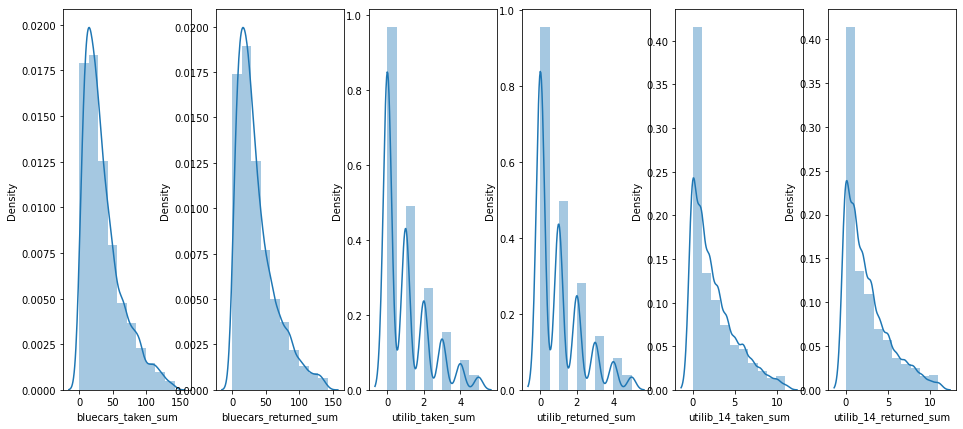

In [45]:
# Plotting Histogram

n_bins = 10

fig, (ax1,ax2,ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize= (16,7))

sns.distplot(autolib_data.bluecars_taken_sum, ax=ax1, bins= n_bins)
sns.distplot(autolib_data.bluecars_returned_sum, ax=ax2, bins= n_bins)
sns.distplot(autolib_data.utilib_taken_sum, ax=ax3, bins= n_bins)
sns.distplot(autolib_data.utilib_returned_sum, ax=ax4, bins= n_bins)
sns.distplot(autolib_data.utilib_14_taken_sum, ax=ax5, bins= n_bins)
sns.distplot(autolib_data.utilib_14_returned_sum, ax=ax6, bins= n_bins);
# The data is right-skewed with a light tail distribution as was discovered by the skewness and kurtosis.

**b) Categorical**

In [46]:
autolib_data_df_new_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

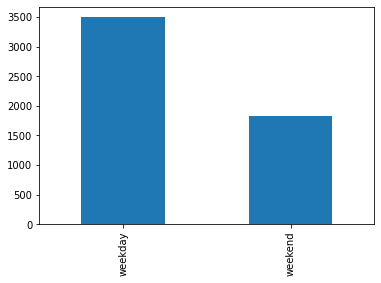

In [47]:
# Comparing the weekday and weekend data

autolib_data_df_new_df['day_type'].value_counts().plot.bar();

**d) Univariate Analysis Recommendation**

The data tail distribution is lightly skewed to the right i.e. platykurtic. Having noted that there were many outliers thus leading to few data points for utilib and utilib 14 cars. I will therefore go with cluster sampling and pick a dataset that was captured during the weekdays where there was much activity recorded for the autolib cars.

### Bivariate Analysis

**Numeric**

In [48]:
autolib_data_df_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5319 entries, 3912 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             5319 non-null   int64         
 1   date                    5319 non-null   datetime64[ns]
 2   n_daily_data_points     5319 non-null   int64         
 3   day_of_week             5319 non-null   int64         
 4   day_type                5319 non-null   object        
 5   bluecars_taken_sum      5319 non-null   int64         
 6   bluecars_returned_sum   5319 non-null   int64         
 7   utilib_taken_sum        5319 non-null   int64         
 8   utilib_returned_sum     5319 non-null   int64         
 9   utilib_14_taken_sum     5319 non-null   int64         
 10  utilib_14_returned_sum  5319 non-null   int64         
 11  slots_freed_sum         5319 non-null   int64         
 12  slots_taken_sum         5319 non-null   int6

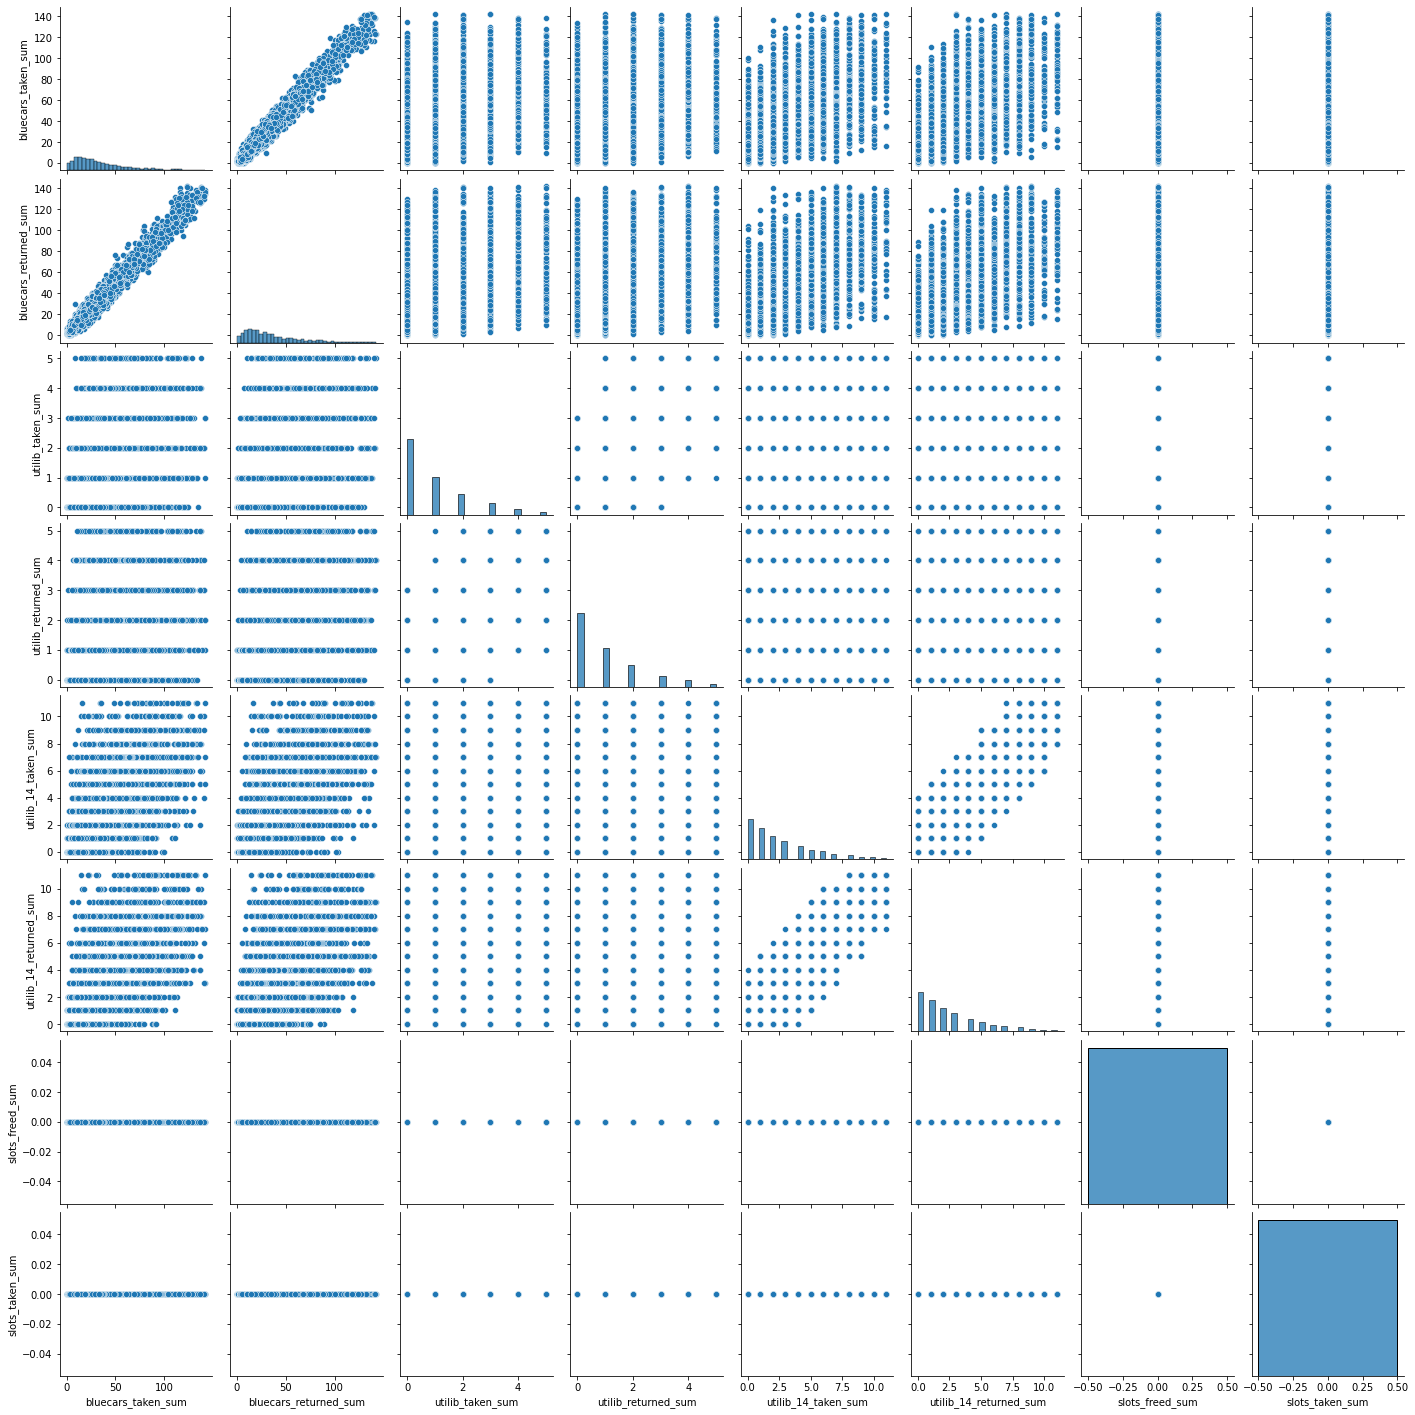

In [49]:
numerical_data_df = autolib_data_df_new_df.drop(['postal_code', 'date', 'n_daily_data_points',
                                              'day_of_week', 'day_type'], axis=1)
sns.pairplot(numerical_data_df);

The plots above indicate a positive linear correlation between the variables.

In [50]:
pearson_coeff_Bluecar = autolib_data_df_new_df["bluecars_taken_sum"].corr(autolib_data_df_new_df["bluecars_returned_sum"], method="pearson") 
print(f'Pearson coefficient of Bluecar taken and returned is: {pearson_coeff_Bluecar}')

pearson_coeff_Bluecar_Free = autolib_data_df_new_df["bluecars_taken_sum"].corr(autolib_data_df_new_df["slots_freed_sum"], method="pearson") 
print(f'Pearson coefficient of Bluecar taken and slots freed is: {pearson_coeff_Bluecar_Free}')

pearson_coeff_Bluecar_Slots = autolib_data_df_new_df["bluecars_taken_sum"].corr(autolib_data_df_new_df["slots_taken_sum"], method="pearson") 
print(f'Pearson coefficient of Bluecar taken and slots taken is: {pearson_coeff_Bluecar_Slots}')

pearson_coeff_Bluecar_return = autolib_data_df_new_df["bluecars_returned_sum"].corr(autolib_data_df_new_df["slots_freed_sum"], method="pearson") 
print(f'Pearson coefficient of Bluecar taken and slots freed is: {pearson_coeff_Bluecar_return}')

pearson_coeff_Bluecar_return_slots = autolib_data_df_new_df["bluecars_returned_sum"].corr(autolib_data_df_new_df["slots_taken_sum"], method="pearson") 
print(f'Pearson coefficient of Bluecar taken and slots taken is: {pearson_coeff_Bluecar_return_slots}')

pearson_coeff_slots = autolib_data_df_new_df["slots_taken_sum"].corr(autolib_data_df_new_df["slots_freed_sum"], method="pearson") 
print(f'Pearson coefficient of slots taken and slots freed is:  {pearson_coeff_slots}')


Pearson coefficient of Bluecar taken and returned is: 0.9845550947372977
Pearson coefficient of Bluecar taken and slots freed is: nan
Pearson coefficient of Bluecar taken and slots taken is: nan
Pearson coefficient of Bluecar taken and slots freed is: nan
Pearson coefficient of Bluecar taken and slots taken is: nan
Pearson coefficient of slots taken and slots freed is:  nan


Strong correlation is seen between the blue cars taken and blue cars returned. 

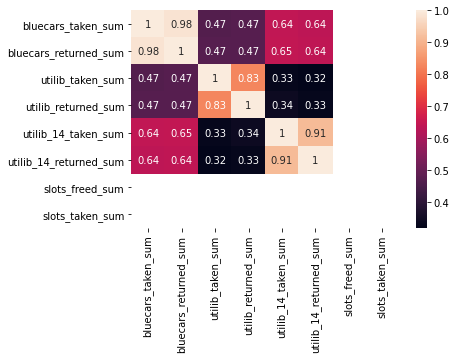

In [51]:
#Checking the correlation among the variables using a heat map
sns.heatmap(numerical_data_df.corr(), annot=True);

The heatmap confirms the correlation found between the variables.

**Categorical**

In [52]:
autolib_data_df_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5319 entries, 3912 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             5319 non-null   int64         
 1   date                    5319 non-null   datetime64[ns]
 2   n_daily_data_points     5319 non-null   int64         
 3   day_of_week             5319 non-null   int64         
 4   day_type                5319 non-null   object        
 5   bluecars_taken_sum      5319 non-null   int64         
 6   bluecars_returned_sum   5319 non-null   int64         
 7   utilib_taken_sum        5319 non-null   int64         
 8   utilib_returned_sum     5319 non-null   int64         
 9   utilib_14_taken_sum     5319 non-null   int64         
 10  utilib_14_returned_sum  5319 non-null   int64         
 11  slots_freed_sum         5319 non-null   int64         
 12  slots_taken_sum         5319 non-null   int6

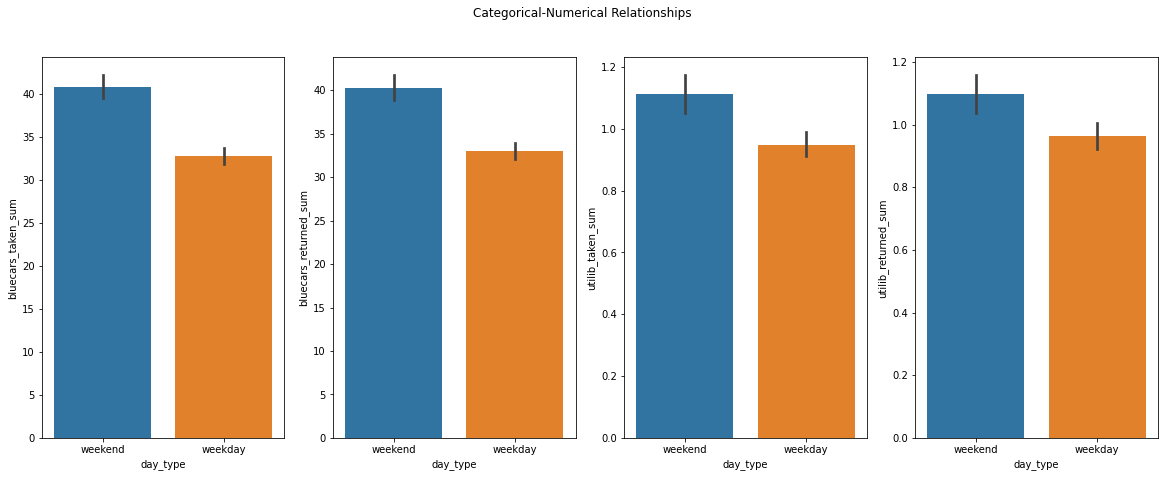

In [53]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= autolib_data_df_new_df['day_type'], y= autolib_data_df_new_df['bluecars_taken_sum'], ax=ax1)
sns.barplot(x= autolib_data_df_new_df['day_type'], y= autolib_data_df_new_df['bluecars_returned_sum'], ax=ax2)
sns.barplot(x= autolib_data_df_new_df['day_type'], y= autolib_data_df_new_df['utilib_taken_sum'], ax=ax3)
sns.barplot(x= autolib_data_df_new_df['day_type'], y= autolib_data_df_new_df['utilib_returned_sum'], ax=ax4)
sns.barplot(x= autolib_data_df_new_df['day_type'], y= autolib_data_df_new_df['utilib_14_taken_sum'], ax=ax5)
sns.barplot(x= autolib_data_df_new_df['day_type'], y= autolib_data_df_new_df['utilib_14_returned_sum'], ax=ax6);


From the univariate analysis, it was evident that most activities was recorded during the weekday. but looking at the above comparison, weekend appears to have many activities because the average is done with two days as compared to 5 days during the week. The weekday figures are affected greatly because only blue cars operate more than the utilib and utilib 14 cars thus the difference in results from bivariate and univariate analysis. 

### Multivariate Analysis

#### Principal component Analysis

In [54]:
# Data for Label encoding

day_type_encoding = autolib_data_df_new_df.copy(deep=True)
day_type_encoding['day_type'] = day_type_encoding['day_type'].astype('category')
day_type_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5319 entries, 3912 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             5319 non-null   int64         
 1   date                    5319 non-null   datetime64[ns]
 2   n_daily_data_points     5319 non-null   int64         
 3   day_of_week             5319 non-null   int64         
 4   day_type                5319 non-null   category      
 5   bluecars_taken_sum      5319 non-null   int64         
 6   bluecars_returned_sum   5319 non-null   int64         
 7   utilib_taken_sum        5319 non-null   int64         
 8   utilib_returned_sum     5319 non-null   int64         
 9   utilib_14_taken_sum     5319 non-null   int64         
 10  utilib_14_returned_sum  5319 non-null   int64         
 11  slots_freed_sum         5319 non-null   int64         
 12  slots_taken_sum         5319 non-null   int6

In [55]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

day_type_encoding['education_level'] = labelencoder.fit_transform(day_type_encoding['day_type'])
day_type_encoding.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,education_level
3912,91330,2018-01-14,1440,6,weekend,27,30,0,0,2,1,0,0,1
3929,91330,2018-01-31,1440,2,weekday,5,5,0,0,0,0,0,0,0
3957,91330,2018-03-03,1440,5,weekend,7,9,1,1,2,1,0,0,1
3958,91330,2018-03-04,1440,6,weekend,14,7,2,1,0,0,0,0,1
3961,91330,2018-03-07,1440,2,weekday,3,6,0,0,0,0,0,0,0


In [56]:
# Change the weekend to 0 and weekday to 1
autolib_data_df_new_df['day_type'] = pd.factorize(autolib_data_df_new_df['day_type'])[0]
autolib_data_df_new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3912,91330,2018-01-14,1440,6,0,27,30,0,0,2,1,0,0
3929,91330,2018-01-31,1440,2,1,5,5,0,0,0,0,0,0
3957,91330,2018-03-03,1440,5,0,7,9,1,1,2,1,0,0
3958,91330,2018-03-04,1440,6,0,14,7,2,1,0,0,0,0
3961,91330,2018-03-07,1440,2,1,3,6,0,0,0,0,0,0


### Choosing the sample size
In order to make a good finding on the blue cars, cluster sampling will be best fit. this is beacuse the other cars will have a chance to be part of the analysis and find out why they are not having many activities as compared to blu cars. For this reason, the cluster sample will be based on the weekday operations

### Hypothesis Testing

Determine if the number of Bluecars taken from postal codes that start with '75' is different than from other postal codes in Paris ?. To investigate this, our hypothesis will be: 

a) The Null Hypothesis is that the number of blue_cars taken in postcodes that start with '75' during the weekdays is more than that taken from other postcodes in Paris.

b) The Alternate Hypothesis is that the number of blue_cars ttaken in postcodes that start with '75' during the weekdays is same than that taken from other postcodes in Paris.



In [69]:
# Considering the two postcodes are in the city area of Paris
autolib_data_df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [70]:
# Target Population

Target = autolib_data_df.copy(deep = True)
Target['Postal code'] = Target['Postal code'].astype(str)
Target['Postal code'].dtype

dtype('O')

In [72]:
Target = Target.loc[Target['Postal code'].str.startswith('75')]
Target['Postal code'] = Target['Postal code'].astype(int)
Target['Postal code'].dtype

dtype('int64')

In [73]:
Target['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116])

In [77]:
print(f'The Paris City data has: {Target.shape[0]} rows')

The Paris City data has: 3431 rows


In [79]:
# Selecting weekdays only

Target = Target[Target['day_type'] == 'weekday']

print(f'The Paris City data for the weekdays has: {Target.shape[0]} rows')

# As was expected, the weekday data contains more data then the weekends.

The Paris City data for the weekdays has: 2463 rows


In [80]:
# We can see that all postcodes have 111 or 112 rows of data each

Target['Postal code'].value_counts()

75019    112
75017    112
75004    112
75006    112
75008    112
75010    112
75012    112
75014    112
75016    112
75018    112
75020    112
75112    112
75001    112
75003    112
75005    112
75007    112
75009    112
75011    112
75013    112
75015    112
75002    112
75116    111
Name: Postal code, dtype: int64

In [84]:
Sample = Target.copy(deep= True)
#Sample.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], 
#            axis = 1, inplace= True)
Sample = Sample.groupby('Postal code', group_keys=False).apply(lambda x: x.sample(30, random_state=10))
Sample

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
143,75001,6/7/2018,1439,3,weekday,113,113,6,6,10,10,20,18
127,75001,5/22/2018,1438,1,weekday,142,144,4,4,12,12,30,32
104,75001,4/18/2018,1377,2,weekday,124,124,2,2,17,18,16,17
67,75001,3/12/2018,1440,0,weekday,99,98,6,6,1,1,15,17
74,75001,3/19/2018,1440,0,weekday,99,96,3,3,18,18,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,75116,3/26/2018,1439,0,weekday,19,15,1,0,0,0,6,5
3411,75116,5/30/2018,1440,2,weekday,14,16,0,0,1,1,6,6
3279,75116,1/4/2018,1320,3,weekday,4,5,0,1,0,0,2,1
3374,75116,4/12/2018,1440,3,weekday,10,9,1,1,0,0,0,0


In [88]:
# previuosly we found population mean = 125.927
# and population standard deviation = 185.427

population_mean = autolib_data_df['BlueCars_returned_sum'].mean()
population_deviation = autolib_data_df['BlueCars_taken_sum'].std()
sample_mean = Sample['BlueCars_taken_sum'].mean()
sample_deviation = Sample['BlueCars_taken_sum'].std()

population_mean, population_deviation, sample_mean, sample_deviation

(125.912713708424, 185.42657876727893, 354.380303030303, 212.801486725454)

In [89]:
# Calculating the z-score

z = (sample_mean - population_mean) / population_deviation
print('The Z-score is: ', z)

The Z-score is:  1.2321188841466952



The z-score tells us that the sample mean is 1.23 standard deviations away from the population mean this is within the 1.645 critical value (since it is a one-tailed test), which is the area where 95% confidence level lies. We can therefore not reject the null hypothesis. 

In [90]:
p_value = 1 - stats.norm.cdf(z)
p_value 

0.10895233909840663

The p value is greater than the alpha therefore the results is not statistically significant. 
Thus indicating strong evidence for the null hypothesis.

In [91]:
# Calculating the point estimate

point_estimate = population_mean - sample_mean
point_estimate

-228.46758932187902

In [92]:
# Calculating the interval estimate

sample_size = Sample.shape[0]
std_error = sample_deviation / np.sqrt(sample_size)

stats.norm.interval(0.95, loc=sample_mean, scale=std_error)


(338.1453595489678, 370.61524651163825)


The interval estimate of the sample mean indicates the range through which the sample mean will be within the 95% Confidence level of the population mean.

**Test Sensitivity**

In [99]:
# Effect of changing the sample size, using a sample size of 90 and a random_state of 20

Sample = Target.copy(deep= True)
#Sample.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], 
#            axis = 1, inplace= True)
Sample = Sample.groupby('Postal code', group_keys=False).apply(lambda x: x.sample(90, random_state=20))
sample_mean = Sample.BlueCars_taken_sum.mean()
sample_deviation = Sample.BlueCars_taken_sum.std()

population_mean, population_deviation, sample_mean, sample_deviation

(125.912713708424, 185.42657876727893, 356.35959595959594, 219.2703182022267)

In [97]:
z = (sample_mean - population_mean) / population_deviation
print('The Z-score is: ', z)

p_value = 1 - stats.norm.cdf(z)
p_value

# There is no significant difference

The Z-score is:  1.2427931517864874


0.10697203336719552

Conclusion

After performing the Test sensitivity, it was evident that by changing the sample size to 90 samples per postcode, there was no significant difference thus proving the rigidity of the method. It was also noted that those postcodes that begun with ‘75’ had a higher mean for blue car collection than all the postcodes (the Z-score (1.23) being less than the Z-critical (1.625), and the p value (0.109) being greater than the alpha (0.05)). The Null Hypothesis could however not be rejected. It is therefore confirmed that these postcodes that start with ‘75’ have a higher average mean of collection of bluecars daily.


### Recommendation

The test suggests that the City Centre area of Paris experiences more customer engagement with the Bluecars. This suggests that the economic activities related to the City have an effect on the rate at which Bluecars are used. 